In [19]:
# import my library
import pandas as pd

import network_analysis as net
import networkx as nx
import matplotlib.pyplot as plt
from netgraph import Graph
import random
%matplotlib inline

In [20]:
# set some filepaths for network creation
ChR2_of = r'C:\Users\Ryan Senne\PycharmProjects\network_analysis\csv_files\ChR2_Small_Box.csv'
control_of = r'C:\Users\Ryan Senne\PycharmProjects\network_analysis\csv_files\Control_Small_Box.csv'

In [21]:
 # THIS IS FOR TEST PURPOSES ONLY
# allen_groups = pd.read_csv('/Users/ryansenne/PycharmProjects/networkx/csv_files/ROIs.csv')
control_data, control_nodes = net.loadData(control_of)
control_rvals, p = net.corrMatrix(control_data, corr_type='Spearman', z_trans=False)
threshold_matrix = net.significanceCheck(p, control_rvals, 1, names=control_nodes, include_Negs=True)
control_per = net.percentile(threshold_matrix, 0.2)
control_G = net.networx(control_per, control_nodes)

chr2_data, chr2_nodes = net.loadData(ChR2_of)
rvals1, p1 = net.corrMatrix(chr2_data, corr_type='Spearman', z_trans=False)
threshold_matrix1 = net.significanceCheck(p1, rvals1, 1, names=chr2_nodes, include_Negs=True)
per1 = net.percentile(threshold_matrix1, 0.2)
chr2_G = net.networx(per1, chr2_nodes)


In [4]:
control_df, control_mc_clusters, control_cluster_vector_mc, control_node_community_dict = net.markov(control_G, control_nodes)

chr2_df, chr2_mc_clusters, chr2_cluster_vector_mc, chr2_node_community_dict = net.markov(chr2_G, chr2_nodes)

In [32]:
control_max_mod_lou_comm, control_lou_max_mod, control_lou_mod_mean, control_cluster_vector_lou = net.louvain(control_G, control_nodes, 50000)

chr2_max_mod_lou_comm, chr2_lou_max_mod, chr2_lou_mod_mean, chr2_cluster_vector_lou = net.louvain(chr2_G, chr2_nodes, 50000)

In [22]:
allen_reg = pd.read_csv(r'C:\Users\Ryan Senne\PycharmProjects\network_analysis\csv_files\ROIs.csv')['Allen Area']

control_df_clust_cuts, control_modularities, control_clust_assigns, control_, control_clust_vector_hc = net.hierarch_clust(control_G, control_nodes, allen_reg)

chr2_df_clust_cuts, chr2_modularities, chr2_clust_assigns, chr2_, chr2_clust_vector_hc = net.hierarch_clust(chr2_G, chr2_nodes, allen_reg)

C:\Users\Ryan Senne\anaconda3\envs\network_analysis\lib\site-packages\scipy\cluster\hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
C:\Users\Ryan Senne\anaconda3\envs\network_analysis\lib\site-packages\scipy\cluster\hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
C:\Users\Ryan Senne\anaconda3\envs\network_analysis\lib\site-packages\scipy\cluster\hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
C:\Users\Ryan Senne\anaconda3\envs\network_analysis\lib\site-packages\scipy\cluster\hierarchy.py:834: ClusterWar

In [26]:
hc_control_clust = [[control_nodes[i] for i in j] for j in control_]
hc_chr2_cluster = [[chr2_nodes[i] for i in j] for j in chr2_]

In [33]:
control_clust = [[control_nodes[i] for i in j] for j in control_max_mod_lou_comm]
chr2_cluster = [[chr2_nodes[i] for i in j] for j in chr2_max_mod_lou_comm]

In [34]:
nx.algorithms.community.modularity(control_G, control_clust)

0.27856228594898924

In [35]:
nx.algorithms.community.modularity(chr2_G, chr2_cluster)

0.19654080896475146

In [10]:
cont_pos_dict = net.get_position_data(control_max_mod_lou_comm, control_nodes, False)
chr2_pos_dict = net.get_position_data(chr2_max_mod_lou_comm, chr2_nodes, False)

my_allen_colors = net.get_allen_colors(r'C:\Users\Ryan Senne\PycharmProjects\network_analysis\csv_files\ROIs.csv')


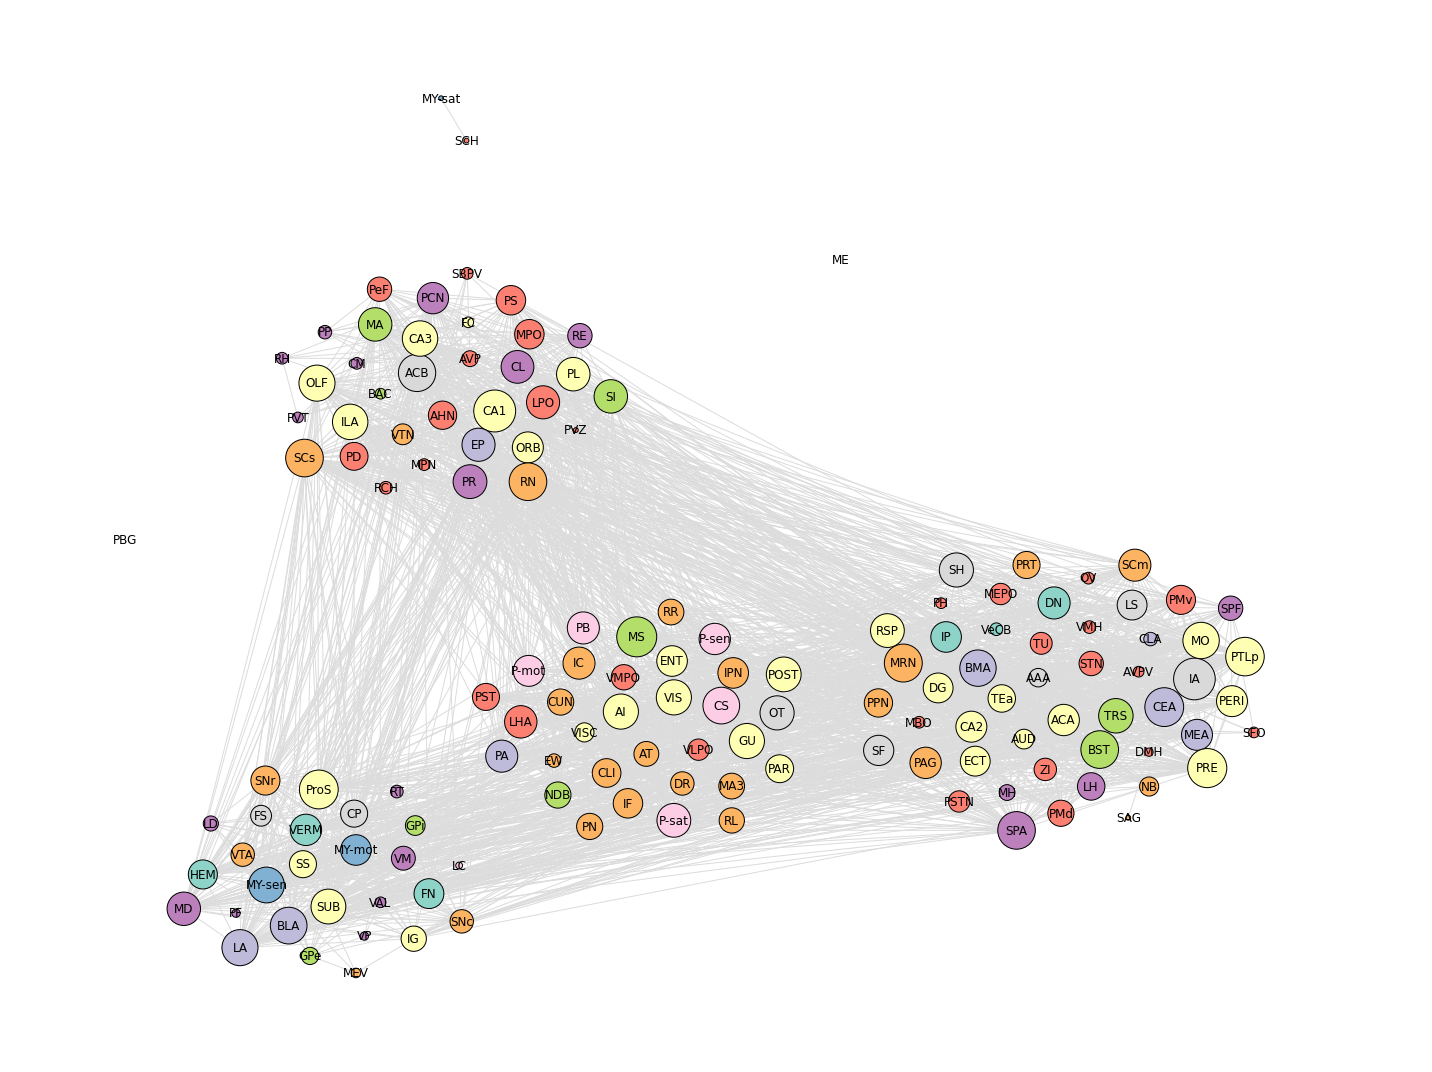

In [36]:
control_graph = net.graph_network(control_G, my_allen_colors, cont_pos_dict)

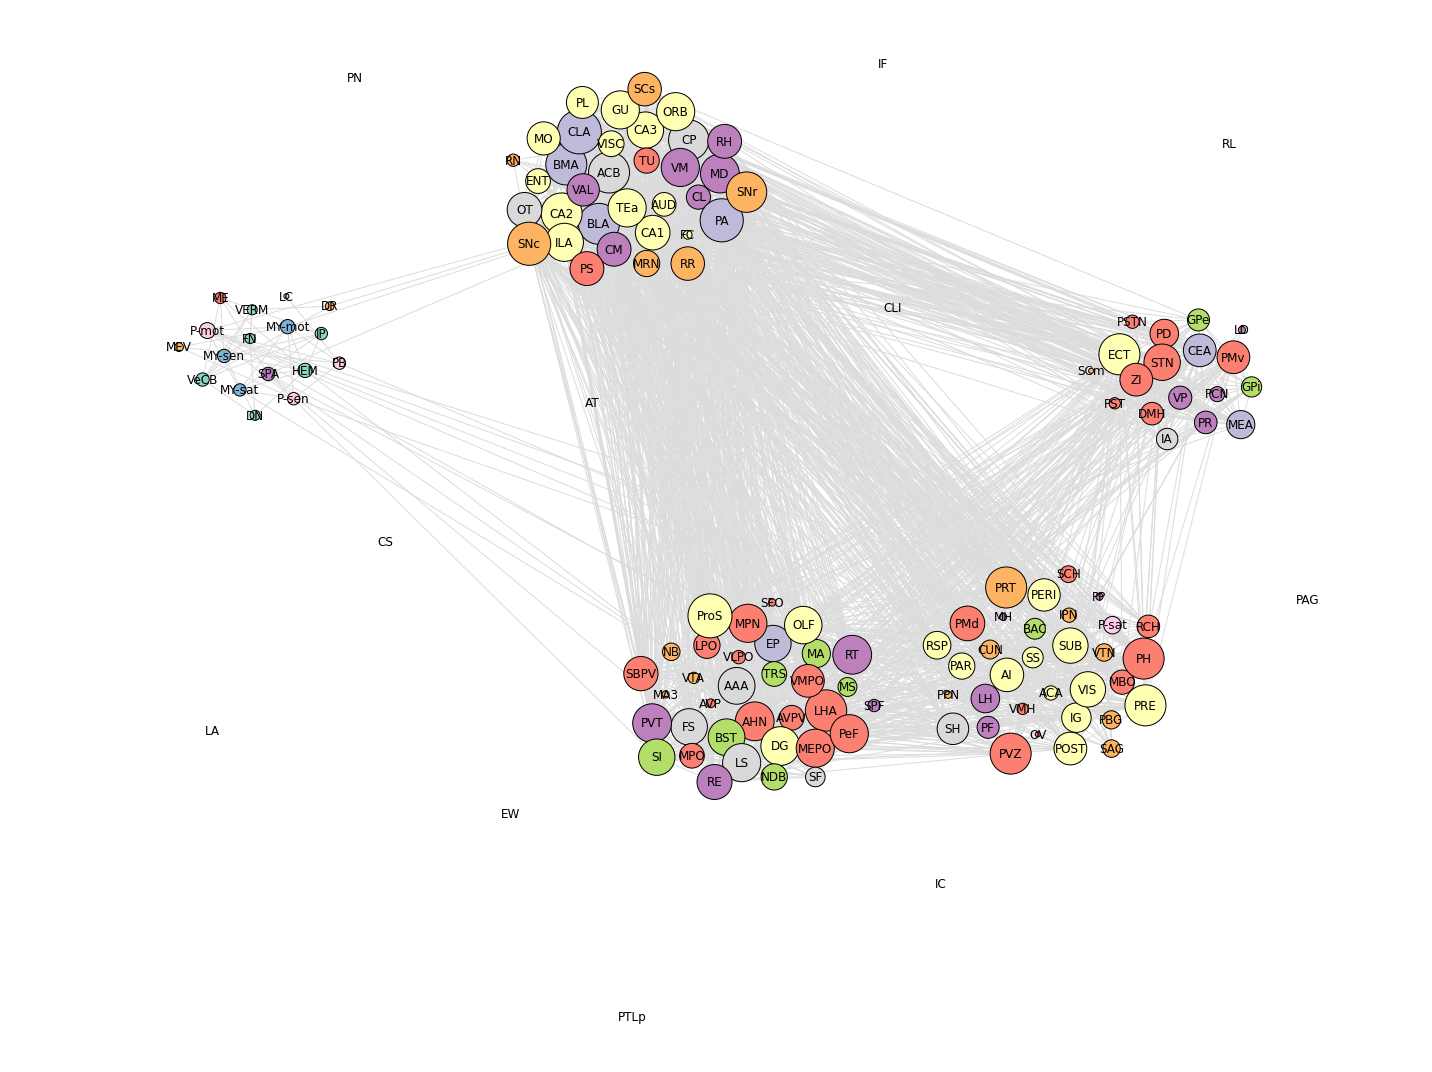

In [37]:
chr2_graph = net.graph_network(chr2_G, my_allen_colors, chr2_pos_dict)

In [16]:
chr2_graph.savefig(r'C:\Users\Ryan Senne\Desktop\chr2_network.svg')

In [17]:
control_graph.savefig(r'C:\Users\Ryan Senne\Desktop\control_network.svg')